In [1]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd        # For loading and processing the dataset
from sklearn.model_selection import train_test_split
import torch
import math
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
import torch.nn.functional as F

In [ ]:
df = pd.DataFrame(pd.read_csv("titanic.csv")) # importo csv
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
PATH = '/Users/roberto/Downloads/train (2).csv'

In [4]:
df = pd.DataFrame(pd.read_csv(PATH)) # importo csv
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum() #controlla se ci sono valori nulli #df = df.dropna() #df = df.dropna(axis=1)    --- fase di preprocessing ;
####vi sono valori nulli, devo andare a risolvere, vanno rimpiazzati con altro

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

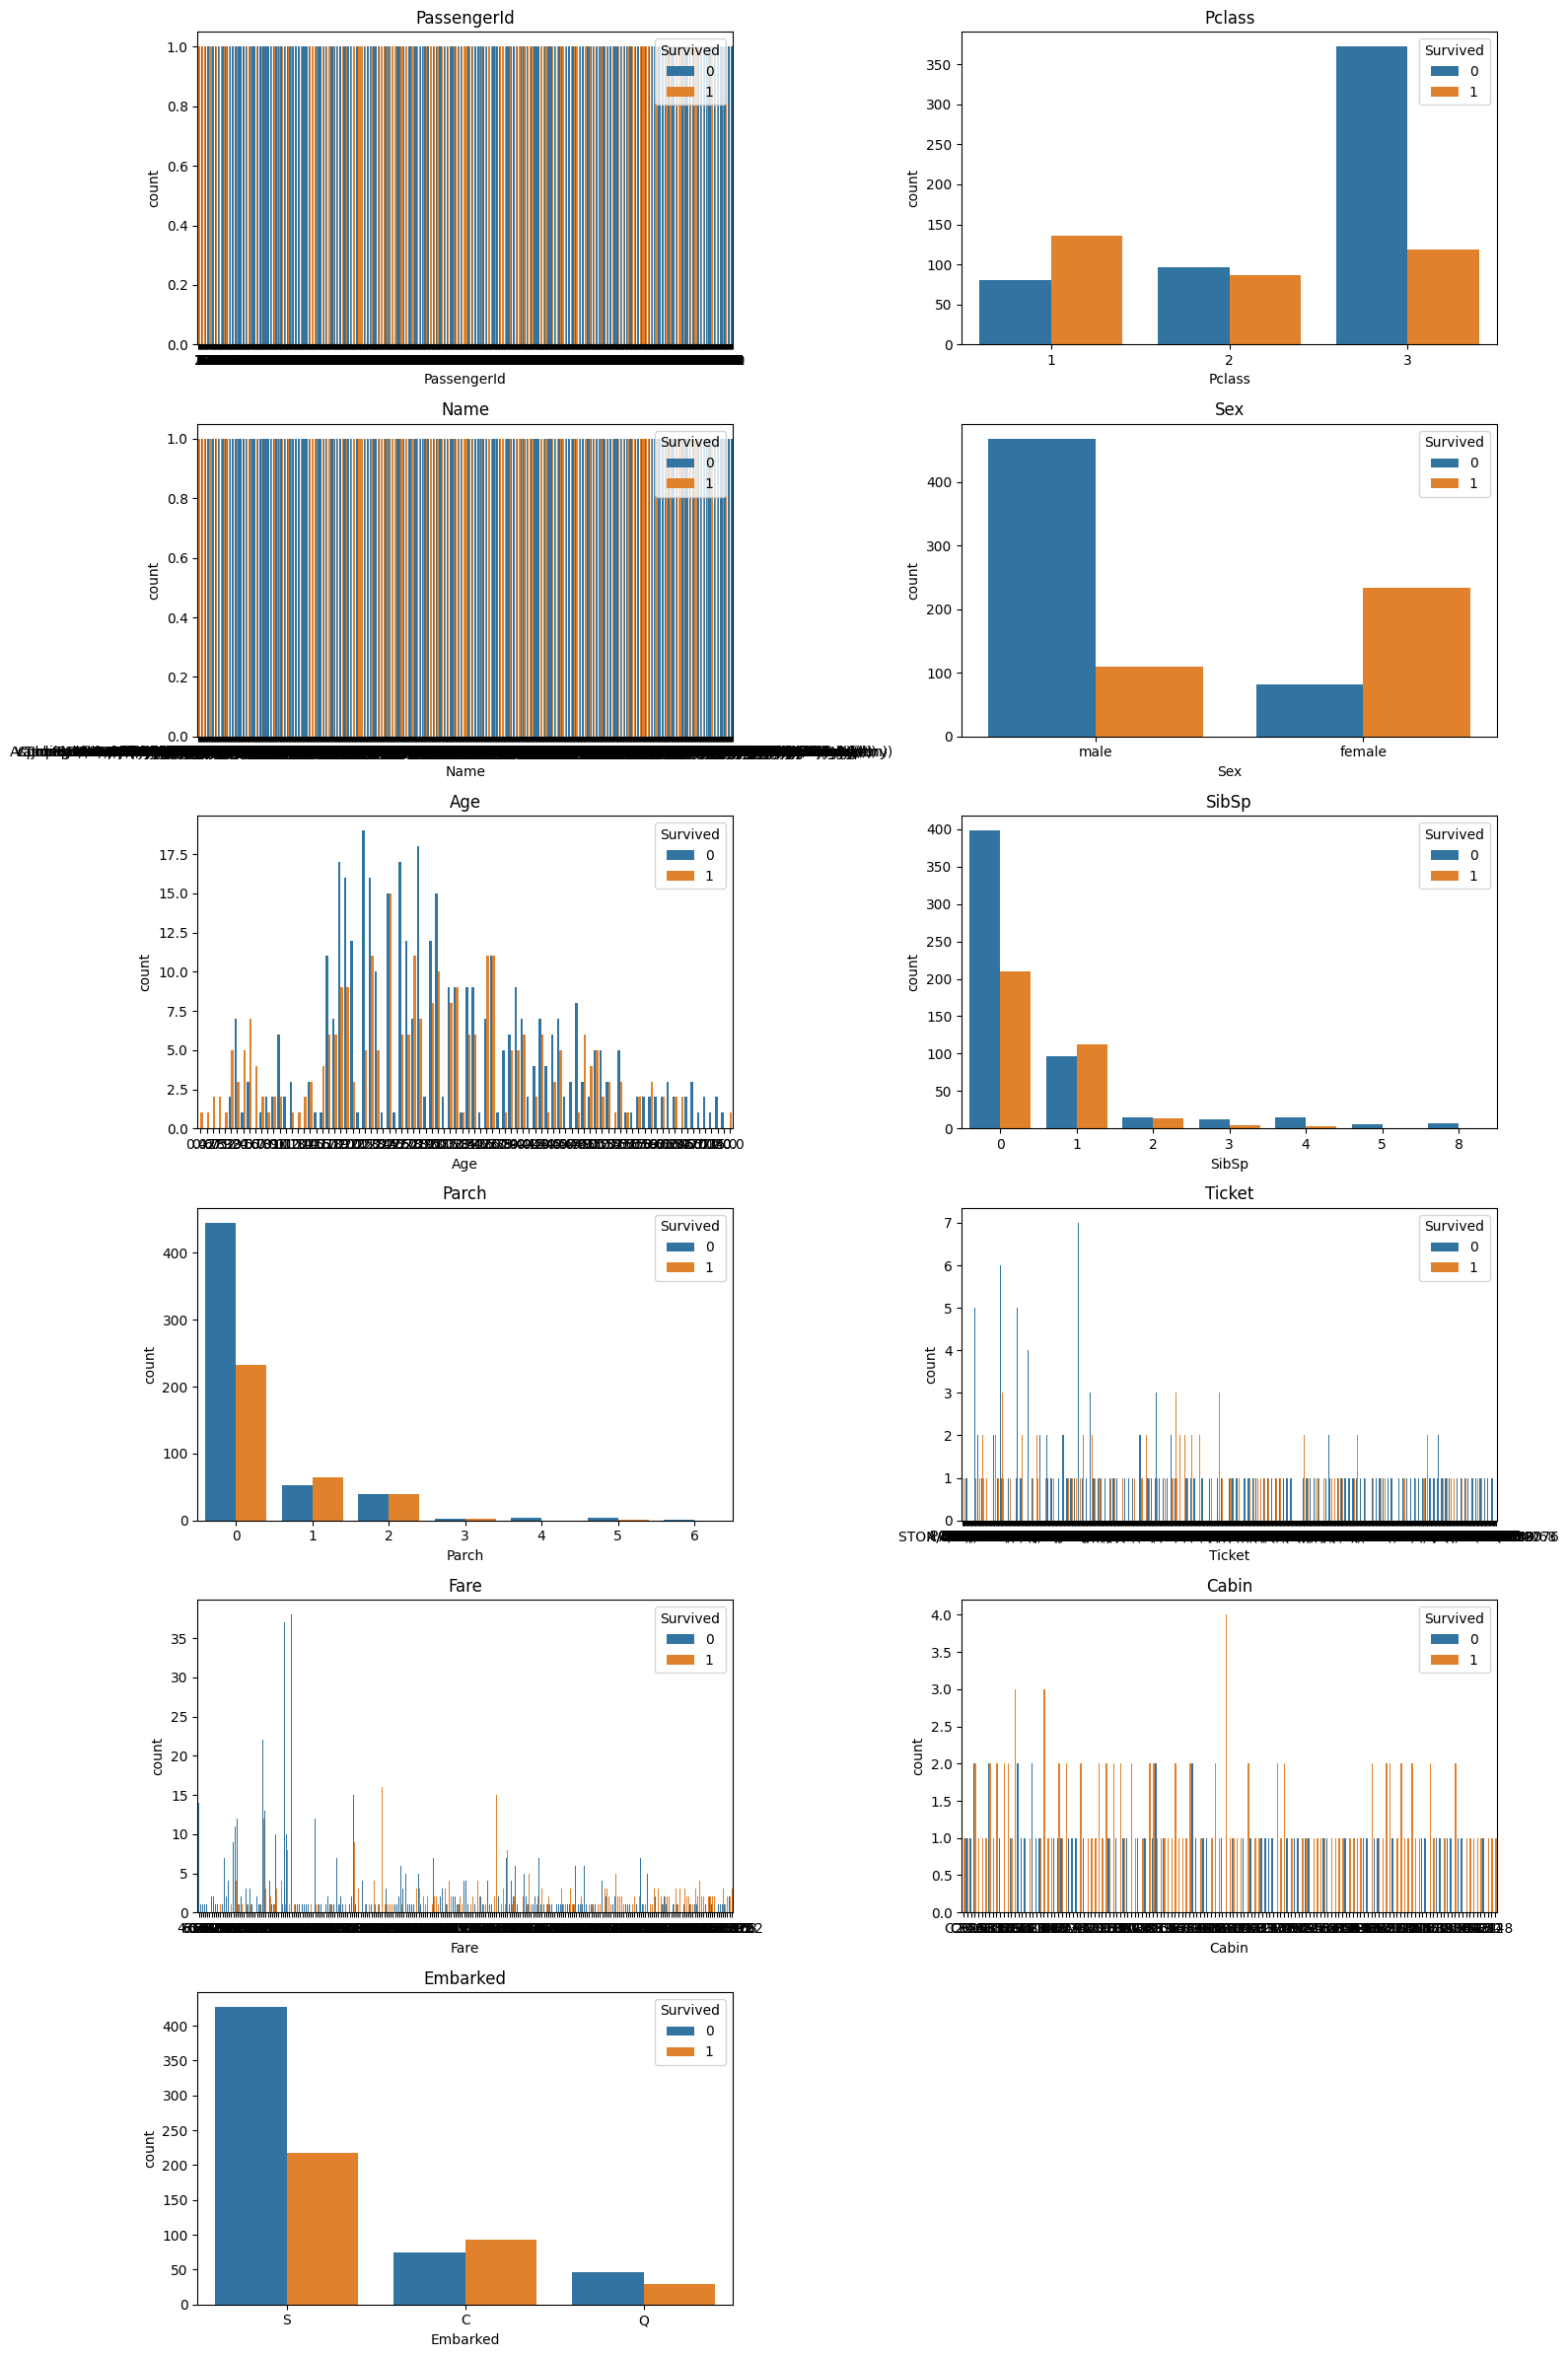

In [7]:
# Definisci le colonne da visualizzare
cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Imposta il numero di righe e colonne nella griglia di subplot
n_rows = 6
n_cols = 2

# Crea una figura e un array di assi con le dimensioni specificate
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 4))

# Inizializza l'indice per le colonne
i = 0

# Itera sulle righe
for r in range(n_rows):
    # Itera sulle colonne
    for c in range(n_cols):
        # Ottieni l'asse corrente
        ax = axs[r][c]
        
        # Verifica se ci sono ancora colonne da visualizzare
        if i < len(cols):
            # Crea un grafico a barre (countplot) utilizzando seaborn
            sns.countplot(x=cols[i], hue='Survived', data=df, ax=ax)
            
            # Imposta il titolo del grafico
            ax.set_title(cols[i])
            
            # Aggiungi una legenda al grafico
            ax.legend(title='Survived', loc='upper right')
            
            # Incrementa l'indice per passare alla prossima colonna
            i += 1
        else:
            # Nasconde gli assi se non ci sono più colonne
            ax.axis('off')

# Regola la disposizione dei subplot per una visualizzazione più pulita
plt.tight_layout()

# Mostra il grafico
plt.show()

In [8]:
# elimino le colonne che non servono   , ad esempio tutte le colonne non categoriche!!
df = df.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [9]:
df.dtypes
####controlla che tipologia di colonne abbiamo , bisogna scalare da 64 a 32 bit !!

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [10]:
#converti da 64 a 32
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)
df.dtypes

Survived      int32
Pclass        int32
Sex          object
Age         float32
SibSp         int32
Parch         int32
Fare        float32
Embarked     object
dtype: object

In [11]:
# Creare un oggetto LabelEncoder

labelencoder=LabelEncoder()
# Iterare attraverso le colonne del DataFrame df
for col in df.columns:
    # Verificare se una colonna ha solo due valori unici (binaria)
    if len(df[col].value_counts())==2:
        # Utilizzare LabelEncoder per convertire i valori della colonna in numeri
        df[col]=labelencoder.fit_transform(df[col])
    
df.dtypes

Survived      int64
Pclass        int32
Sex           int64
Age         float32
SibSp         int32
Parch         int32
Fare        float32
Embarked     object
dtype: object

In [12]:
#La codifica one-hot trasforma variabili categoriche in numeri binari (0 o 1) e
#crea nuove colonne corrispondenti ai 
#diversi valori presenti nella colonna originale.,    valori attributi nella stessa colonna ....(vista volta precedente)
df=pd.get_dummies(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.250000,False,False,True
1,1,1,0,38.0,1,0,71.283302,True,False,False
2,1,3,0,26.0,0,0,7.925000,False,False,True
3,1,1,0,35.0,1,0,53.099998,False,False,True
4,0,3,1,35.0,0,0,8.050000,False,False,True


In [13]:
# Calcola la media e la deviazione standard dell'età ( è un modo per normalizzare e standardizzare elementi nel dataset)
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# Normalizza l'età sottraendo la media e dividendo per la deviazione standard  ---->>>> metodo per standardizzare !!!
df['Age'] = (df['Age'] - age_mean) / age_std

# Calcola la media e la deviazione standard del prezzo del biglietto (Fare)
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()

# Normalizza il prezzo del biglietto sottraendo la media e dividendo per la deviazione standard
df['Fare'] = (df['Fare'] - fare_mean) / fare_std

# Sostituisci i valori mancanti nell'età con la media dell'età
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Mostra le prime righe del DataFrame dopo le operazioni di normalizzazione e gestione dei valori mancanti
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.530005,1,0,-0.502163,False,False,True
1,1,1,0,0.571430,1,0,0.786404,True,False,False
2,1,3,0,-0.254646,0,0,-0.488580,False,False,True
3,1,1,0,0.364911,1,0,0.420494,False,False,True
4,0,3,1,0.364911,0,0,-0.486064,False,False,True


Epoch [10/100], Loss: 0.6030168533325195
Epoch [20/100], Loss: 0.5602025985717773
Epoch [30/100], Loss: 0.5258753895759583
Epoch [40/100], Loss: 0.49843207001686096
Epoch [50/100], Loss: 0.4765510857105255
Epoch [60/100], Loss: 0.4591963589191437
Epoch [70/100], Loss: 0.44529345631599426
Epoch [80/100], Loss: 0.43432193994522095
Epoch [90/100], Loss: 0.42557865381240845
Epoch [100/100], Loss: 0.41848158836364746
Accuracy: 81.01%
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
Confusion Matrix:
[[91 14]
 [20 54]]


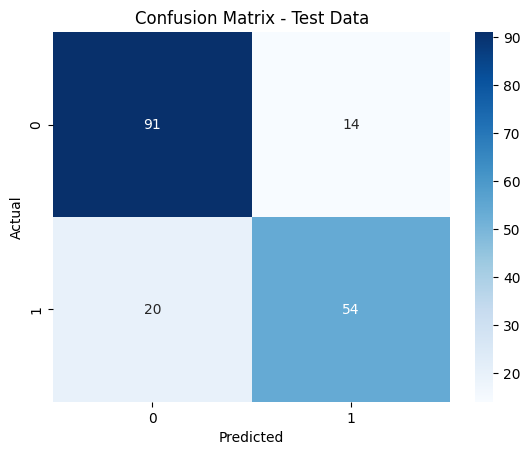

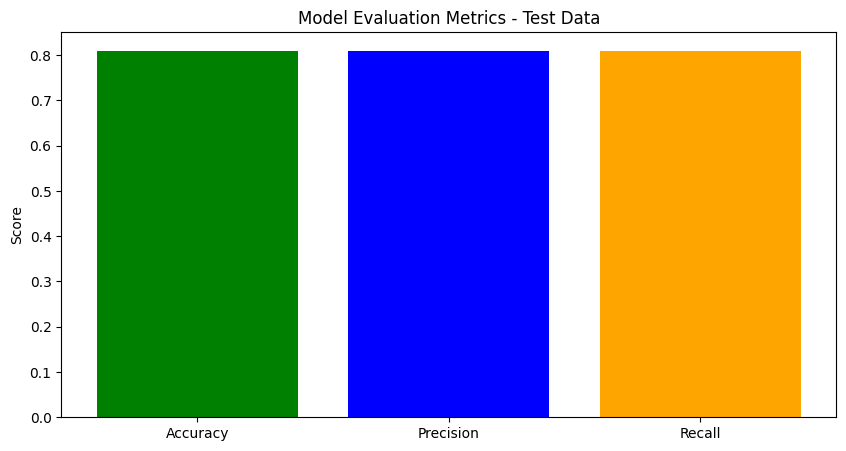

In [14]:
####QUI SI ENTRA NEL VIVO DELL'ANALISI 
#SI CERCA DI ESTRAPOLARE LA PRIMA COLONNA DEL TRAINING , 

# Seleziona le colonne di input e di output nel set di addestramento
features_train = df.columns[1:]  # Tutte le colonne tranne la prima (che è 'Survived')
target_train = 'Survived'  # La colonna 'Survived' è l'output desiderato  , UNA VOLTA ESTRAPOLATO , IL NOSTRO TARGET TRAINED è 'SURVIVED'

# Dividi il dataset in set di addestramento e di test, (CON 80% TRAIN E 20% TEST)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Normalizza i dati di addestramento ( PRENDI TUTTE LE COLONNE E STANDARDIZZALE , OSSIA METTILE TUTTE NELLO STESSO FORMATO!!!), PRIMA AVEVO FATTO MA NON PER TUTTE !

scaler = StandardScaler()
train_data[features_train] = scaler.fit_transform(train_data[features_train])

# Converte i dati di addestramento in tensori PyTorch  ----->>>> VA FATTO PRIMA DI AVVIARE L'ADDESTRAMENTO .... CONVERTIRE FORMATO DA DATAFRAME A TENSORI , 
### ANDARE A DEFINIRE I TENSORI , I TENSORI POSSON ESSER VISTI COME LISTE DI LISTE.


X_train_tensor = torch.FloatTensor(train_data[features_train].values)
y_train_tensor = torch.LongTensor(train_data[target_train].values)

# Definisci una rete feedforward a due strati in PyTorch    , per costruire rete neurale costrisco classe , con il costruttore dove specifico : come dev'esser fatta : input layes, etcc..
class FeedForwardNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedForwardNet, self).__init__()
        
        # Primo strato lineare (perchè non devo fare alcun tipo di operazione , self ::oggetto richiama se stesso , gli chiediamo di costruire primo strato , input size e hidden size
        # dopo input size, devio avere uno stato nascosto)
        self.fc1 = nn.Linear(input_size, hidden_size)
        
        # Funzione di attivazione ReLU ---->>>> aggiungi all'interno di ogni stato nascosto , la funzione di attivazione ReLu    STABILIAMO I COOLLEGAMENTI
        self.relu = nn.ReLU()
        
        # Secondo strato lineare , che ricevere hidden size e output....()     

        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Flusso di avanzamento della rete
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Dimensioni dei dati di input, hidden layer e output  , UNA VOLTA INIZIALIZZATA LA RETE , ANDIAMO A RIEMPIRLA
input_size = len(features_train)
hidden_size = 64
output_size = len(df[target_train].unique())   #STIAMO PRENDENDO VALORI UNICI PER FARE IN MODO TALE CH ELE CLASSI CHE CI ASPETTIAMO SIANO LE STESSE REALI , 

# Inizializza la rete , CHIAMO LA CLASSE FEED FORWARD
model = FeedForwardNet(input_size, hidden_size, output_size)

# Definisci la funzione di perdita e l'ottimizzatore , DEFINISCO LA LOSS, CALCOLO DELL'ERRORE , SI USA NEGLI ALGORITMI DI CLASSIFIZAIONE BINARIA E MULTICLASSE
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)   ### TESTTIAMO TUTTI I PARAMETR DELLA RETE CON UN PARAMETRO ERRORE DI 0.001 ....

# Numero di epoche di addestramento   (SERVONO NUMERI ALTI INTERI 100,200 ETC....)

num_epochs = 100

# Ciclo di addestramento , PER OGNI EPOCA ALL'INTERNO DELL NUMERO DI EPOCHE VADO AD ADDESTRARE IL MODELLO , 
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)

    # Calcola la perdita
    loss = criterion(outputs, y_train_tensor)

    # Backward pass e ottimizzazione , SI VA A CALCOLARE I GRADIENTI, LA FUNZIONE DI LOSS E VA AD aggioornare i pesi ==== passo di apprendimento della ret, per ogni ciclo vengono aggiornati i pesi ....
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Stampa la perdita ogni 10 epoche
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Normalizza i dati di test utilizzando lo stesso scaler , applichiamo ora la scalatura sul test set , ossia l'altra parte del test set
test_data[features_train] = scaler.transform(test_data[features_train])

# Converte i dati di test in tensori PyTorch , (identico procedimento ma per i dati di test::)
X_test_tensor = torch.FloatTensor(test_data[features_train].values)
y_test_tensor = torch.LongTensor(test_data[target_train].values)

# Valutazione del modello sul set di test, 
with torch.no_grad():   #serve per evitare che ci stampi continuamente in calcolo del gradiente , ma a noi non ci interessa 
    # Imposta il modello in modalità di valutazione , 
    model.eval()

    # Forward pass sui dati di test (dammi il valore che hai predetto e dimmi in che classe lo stai mettendo)
    outputs_test = model(X_test_tensor)

    # Ottieni le previsioni prendendo l'indice del massimo valore nelle previsioni
    _, predicted_test = torch.max(outputs_test, 1)


# Calcola e stampa le metriche di valutazione
accuracy = accuracy_score(y_test_tensor.numpy(), predicted_test.numpy())
precision = precision_score(y_test_tensor.numpy(), predicted_test.numpy(), average='weighted')
recall = recall_score(y_test_tensor.numpy(), predicted_test.numpy(), average='weighted')
f1 = f1_score(y_test_tensor.numpy(), predicted_test.numpy(), average='weighted')
conf_matrix = confusion_matrix(y_test_tensor.numpy(), predicted_test.numpy())

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot della Confusion Matrix utilizzando seaborn
class_names = df[target_train].unique()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot degli istogrammi di Accuracy, Precision e Recall
metrics_names = ['Accuracy', 'Precision', 'Recall']
metrics_values = [accuracy, precision, recall]

plt.figure(figsize=(10, 5))
plt.bar(metrics_names, metrics_values, color=['green', 'blue', 'orange'])
plt.title('Model Evaluation Metrics - Test Data')
plt.ylabel('Score')
plt.show()


###commenti metriche qui sotto ::
#man mano che aumentiamo il numero di epoche , deve dimuire la loss , se ho un caso in cui non succede, ciò può esser indice di overfitting , devo resettare i parametri (se non basta fare preprocessing dei dati
# , ma se non basta manco questo posso anche modificare architettura della rete.....che vedremo la prossima volta, 
# 0 = morto , 1 = sopravissuto , lui ha classificato come morti 91 persone e 14 morti leha misclassificati come vivi, 
# ed ha anche classificato come morte 22 persoone che sono vive , ma 52 vive che effettivamente lo sono !
# )

Epoch [10/100], Loss: 0.6650481224060059
Epoch [20/100], Loss: 0.6640111207962036
Epoch [30/100], Loss: 0.6629807353019714
Epoch [40/100], Loss: 0.661957323551178
Epoch [50/100], Loss: 0.6609405875205994
Epoch [60/100], Loss: 0.659930408000946
Epoch [70/100], Loss: 0.6589270830154419
Epoch [80/100], Loss: 0.6579301953315735
Epoch [90/100], Loss: 0.6569398641586304
Epoch [100/100], Loss: 0.655955970287323
Accuracy (Perceptron): 72.63%
Precision (Perceptron): 0.74
Recall (Perceptron): 0.73
F1 Score (Perceptron): 0.73
Confusion Matrix (Perceptron):
[[73 32]
 [17 57]]


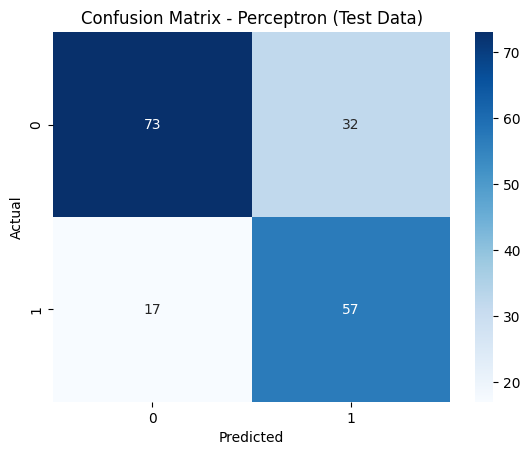

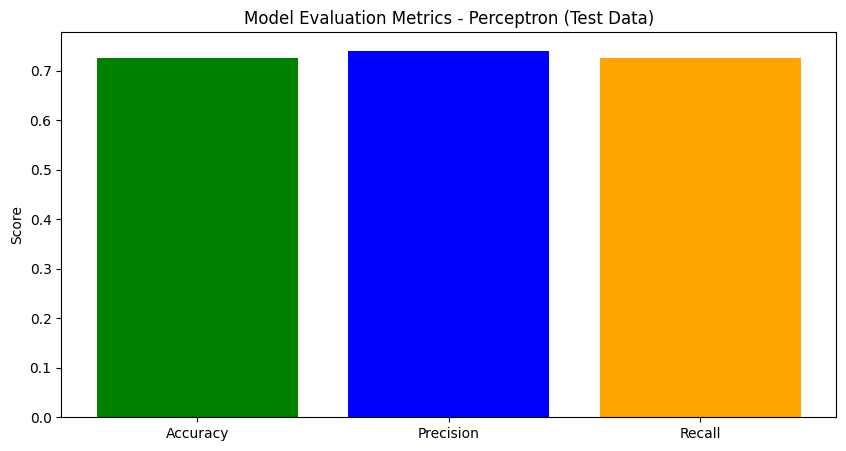

In [27]:
####qui ho eseguito la stessa cosa  per il percettrone , definisco input e funzione di attivazione senza strati nascosti o livelli di output , vi è solo 1 neurone ....(
# il resrto del codice è uguale al precendente , l'algorimto utilizzato è quello della discesa del gradiente , 
# ha un accuracy ( il percetttrone ) bassa , ha preso solo colonne che hanno o tutte 0 o tutte 1 , le altre non le ha prese in considerazioine , 
# architettura stessa non è in grado di farlo )



#  Definisci la rete perceptron
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        
        # Definisci un layer lineare con un singolo neurone
        self.fc = nn.Linear(input_size, 1)
        
        # Applica la funzione di attivazione Sigmoid
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Passa l'input attraverso il layer lineare
        x = self.fc(x)
        
        # Applica la funzione di attivazione Sigmoid
        x = self.sigmoid(x)
        
        return x

# Inizializza il perceptron
input_size = len(features_train)
perceptron_model = Perceptron(input_size)

# Definisci la funzione di perdita e l'ottimizzatore
criterion_perceptron = nn.BCELoss()  # Binary Cross Entropy Loss per problemi di classificazione binaria
optimizer_perceptron = optim.SGD(perceptron_model.parameters(), lr=0.001)

# Addestramento del perceptron
num_epochs_perceptron = 100

for epoch in range(num_epochs_perceptron):
    # Forward pass
    outputs_perceptron = perceptron_model(X_train_tensor)

    # Calcola la perdita
    loss_perceptron = criterion_perceptron(outputs_perceptron.squeeze(), y_train_tensor.float())  # Binary Cross Entropy richiede float

    # Backward pass e ottimizzazione
    optimizer_perceptron.zero_grad()
    loss_perceptron.backward()
    optimizer_perceptron.step()

    # Stampa la perdita ogni 10 epoche
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_perceptron}], Loss: {loss_perceptron.item()}')

# Valutazione del perceptron sul set di test
with torch.no_grad():
    perceptron_model.eval()
    outputs_test_perceptron = perceptron_model(X_test_tensor)
    predicted_test_perceptron = torch.round(outputs_test_perceptron).squeeze().numpy()

# Calcola e stampa le metriche di valutazione per il perceptron
accuracy_perceptron = accuracy_score(y_test_tensor.numpy(), predicted_test_perceptron)
precision_perceptron = precision_score(y_test_tensor.numpy(), predicted_test_perceptron, average='weighted')
recall_perceptron = recall_score(y_test_tensor.numpy(), predicted_test_perceptron, average='weighted')
f1_perceptron = f1_score(y_test_tensor.numpy(), predicted_test_perceptron, average='weighted')
conf_matrix_perceptron = confusion_matrix(y_test_tensor.numpy(), predicted_test_perceptron)

print(f'Accuracy (Perceptron): {accuracy_perceptron * 100:.2f}%')
print(f'Precision (Perceptron): {precision_perceptron:.2f}')
print(f'Recall (Perceptron): {recall_perceptron:.2f}')
print(f'F1 Score (Perceptron): {f1_perceptron:.2f}')
print('Confusion Matrix (Perceptron):')
print(conf_matrix_perceptron)

# Plot della Confusion Matrix per il perceptron
class_names_perceptron = df[target_train].unique()
sns.heatmap(conf_matrix_perceptron, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_perceptron, yticklabels=class_names_perceptron)
plt.title('Confusion Matrix - Perceptron (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot degli istogrammi di Accuracy, Precision e Recall per il perceptron
metrics_names_perceptron = ['Accuracy', 'Precision', 'Recall']
metrics_values_perceptron = [accuracy_perceptron, precision_perceptron, recall_perceptron]

plt.figure(figsize=(10, 5))
plt.bar(metrics_names_perceptron, metrics_values_perceptron, color=['green', 'blue', 'orange'])
plt.title('Model Evaluation Metrics - Perceptron (Test Data)')
plt.ylabel('Score')
plt.show()



Epoch [10/100], Loss: 0.6233059167861938
Epoch [20/100], Loss: 0.5274416208267212
Epoch [30/100], Loss: 0.4397556781768799
Epoch [40/100], Loss: 0.41834545135498047
Epoch [50/100], Loss: 0.39964771270751953
Epoch [60/100], Loss: 0.3868947923183441
Epoch [70/100], Loss: 0.3761870563030243
Epoch [80/100], Loss: 0.36675673723220825
Epoch [90/100], Loss: 0.357867568731308
Epoch [100/100], Loss: 0.34912610054016113
Accuracy (More Complex Model): 83.24%
Precision (More Complex Model): 0.83
Recall (More Complex Model): 0.83
F1 Score (More Complex Model): 0.83
Confusion Matrix (More Complex Model):
[[95 10]
 [20 54]]


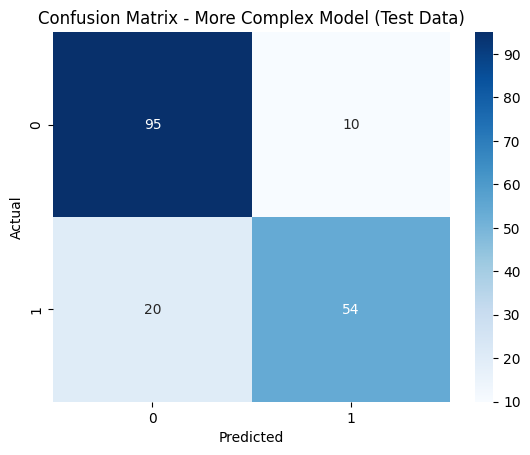

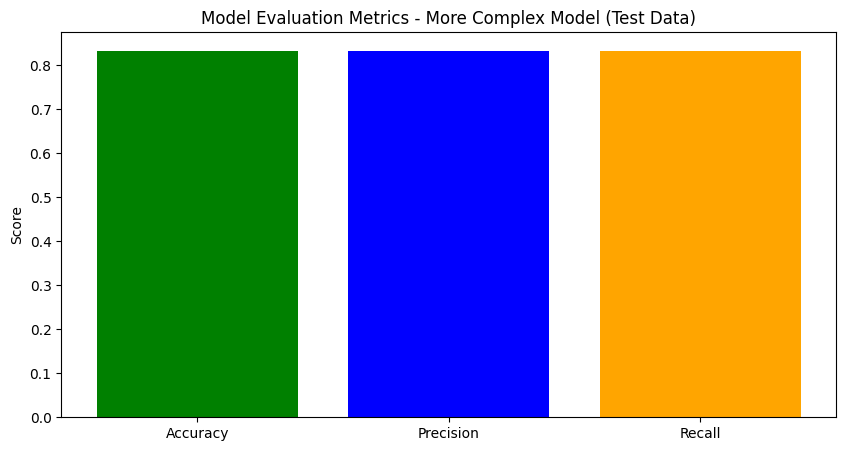

In [28]:
#ààdefiniamo qui due stati nascosti in più nella rete feed forward, (
# accuracy si è alzata del 2/3% ,  che non è comunque banale :),  modificando solo architettura !!!


# Definisci la rete feedforward con più strati nascosti
class MoreComplexFeedForwardNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(MoreComplexFeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Inizializza la rete con più strati nascosti
input_size = len(features_train)
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = len(df[target_train].unique())
more_complex_model = MoreComplexFeedForwardNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Definisci la funzione di perdita e l'ottimizzatore
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(more_complex_model.parameters(), lr=0.001)

# Addestramento del modello con più strati nascosti
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    outputs = more_complex_model(X_train_tensor)

    # Calcola la perdita
    loss = criterion(outputs, y_train_tensor)

    # Backward pass e ottimizzazione
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Stampa la perdita ogni 10 epoche
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Valutazione del modello con più strati nascosti sul set di test
with torch.no_grad():
    more_complex_model.eval()
    outputs_test_complex = more_complex_model(X_test_tensor)
    _, predicted_test_complex = torch.max(outputs_test_complex, 1)

# Calcola e stampa le metriche di valutazione per il modello con più strati nascosti
accuracy_complex = accuracy_score(y_test_tensor.numpy(), predicted_test_complex.numpy())
precision_complex = precision_score(y_test_tensor.numpy(), predicted_test_complex.numpy(), average='weighted')
recall_complex = recall_score(y_test_tensor.numpy(), predicted_test_complex.numpy(), average='weighted')
f1_complex = f1_score(y_test_tensor.numpy(), predicted_test_complex.numpy(), average='weighted')
conf_matrix_complex = confusion_matrix(y_test_tensor.numpy(), predicted_test_complex.numpy())

print(f'Accuracy (More Complex Model): {accuracy_complex * 100:.2f}%')
print(f'Precision (More Complex Model): {precision_complex:.2f}')
print(f'Recall (More Complex Model): {recall_complex:.2f}')
print(f'F1 Score (More Complex Model): {f1_complex:.2f}')
print('Confusion Matrix (More Complex Model):')
print(conf_matrix_complex)

# Plot della Confusion Matrix per il modello con più strati nascosti
class_names_complex = df[target_train].unique()
sns.heatmap(conf_matrix_complex, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_complex, yticklabels=class_names_complex)
plt.title('Confusion Matrix - More Complex Model (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot degli istogrammi di Accuracy, Precision e Recall per il modello con più strati nascosti
metrics_names_complex = ['Accuracy', 'Precision', 'Recall']
metrics_values_complex = [accuracy_complex, precision_complex, recall_complex]

plt.figure(figsize=(10, 5))
plt.bar(metrics_names_complex, metrics_values_complex, color=['green', 'blue', 'orange'])
plt.title('Model Evaluation Metrics - More Complex Model (Test Data)')
plt.ylabel('Score')
plt.show()

